In [1]:
!pip install matplotlib matplotlib-fontja prophet


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import json
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib_fontja
from pathlib import Path
from tqdm.notebook import tqdm
from datetime import datetime

/tmp/ipykernel_1178198/442558147.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Importing plotly failed. Interactive plots will not work.


In [3]:

rows = []
for catalog_filepath in tqdm(sorted(Path("./log/catalog").glob("*.json"))):
    fetched_at = datetime.strptime(catalog_filepath.stem, "%Y-%m-%d-%H%M")
    with open(catalog_filepath, "r") as f:
        catalog = json.load(f)
    
    rows.append({
        "fetched_at": fetched_at,
        "catalog_length": len(catalog["res"]),
    })

  0%|          | 0/8416 [00:00<?, ?it/s]

In [4]:
df_catalog = pd.DataFrame.from_dict(rows)
df_catalog.to_parquet("catalog.parquet")

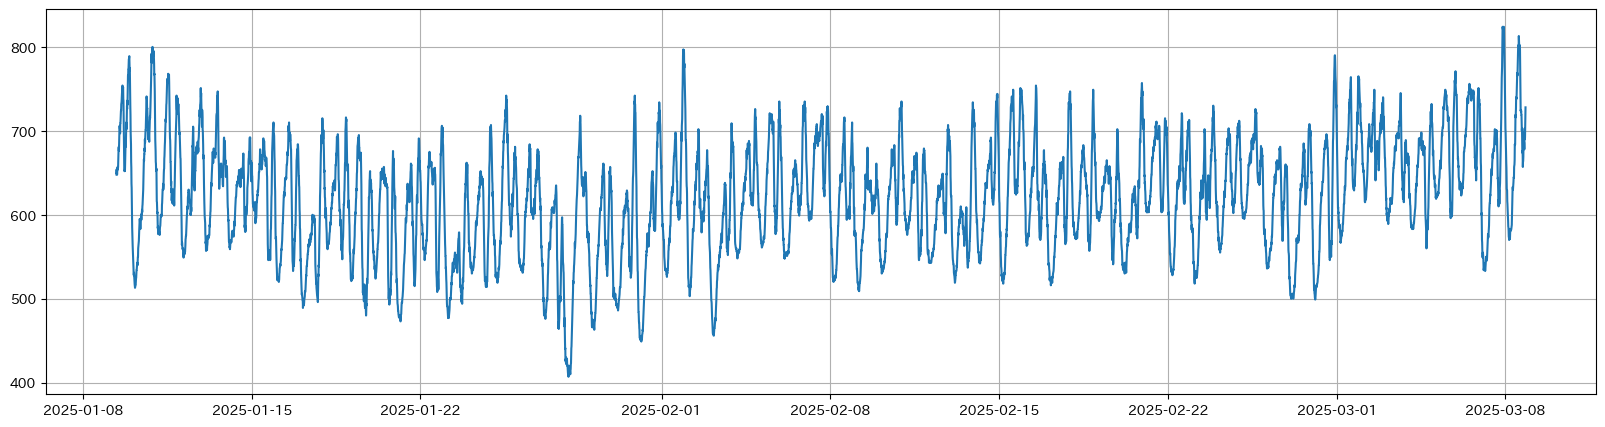

In [5]:
df_catalog = pd.read_parquet("catalog.parquet")

plt.rcParams['figure.figsize'] = [20.0, 5.0]
plt.plot(df_catalog["fetched_at"], df_catalog["catalog_length"])
plt.grid()

04:15:06 - cmdstanpy - INFO - Chain [1] start processing
04:15:15 - cmdstanpy - INFO - Chain [1] done processing


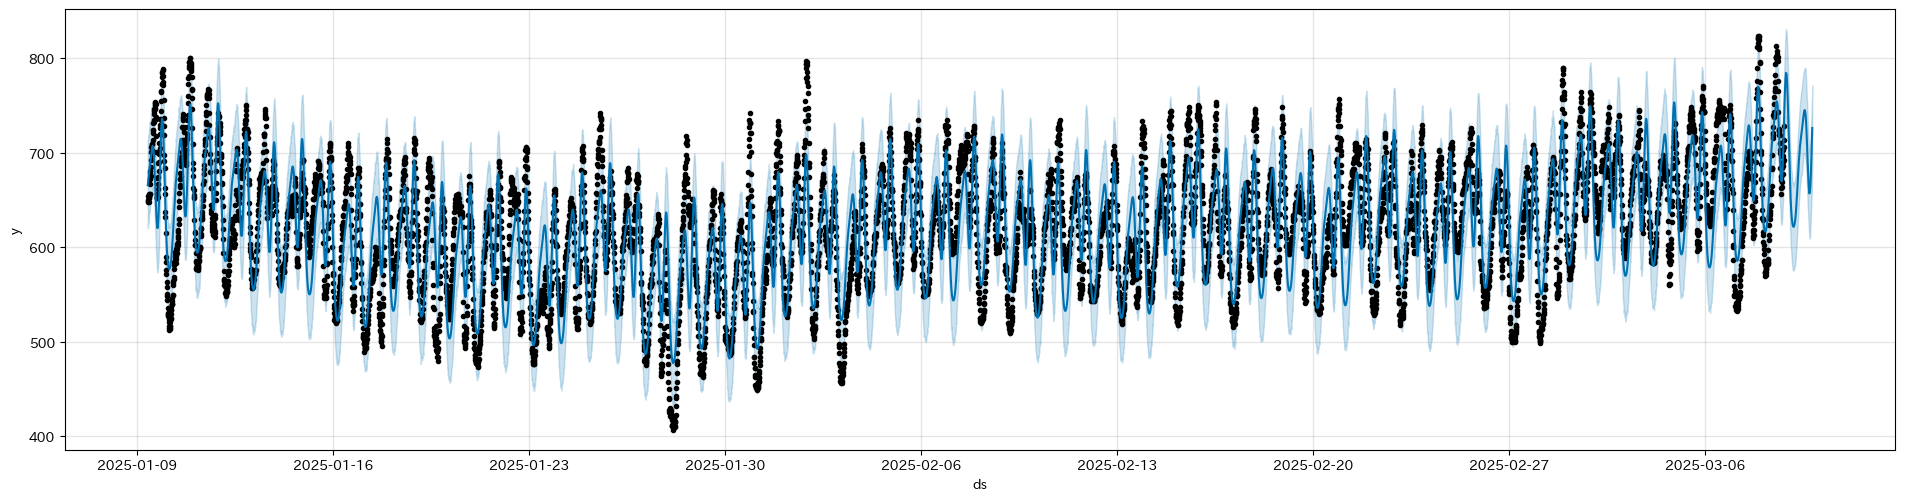

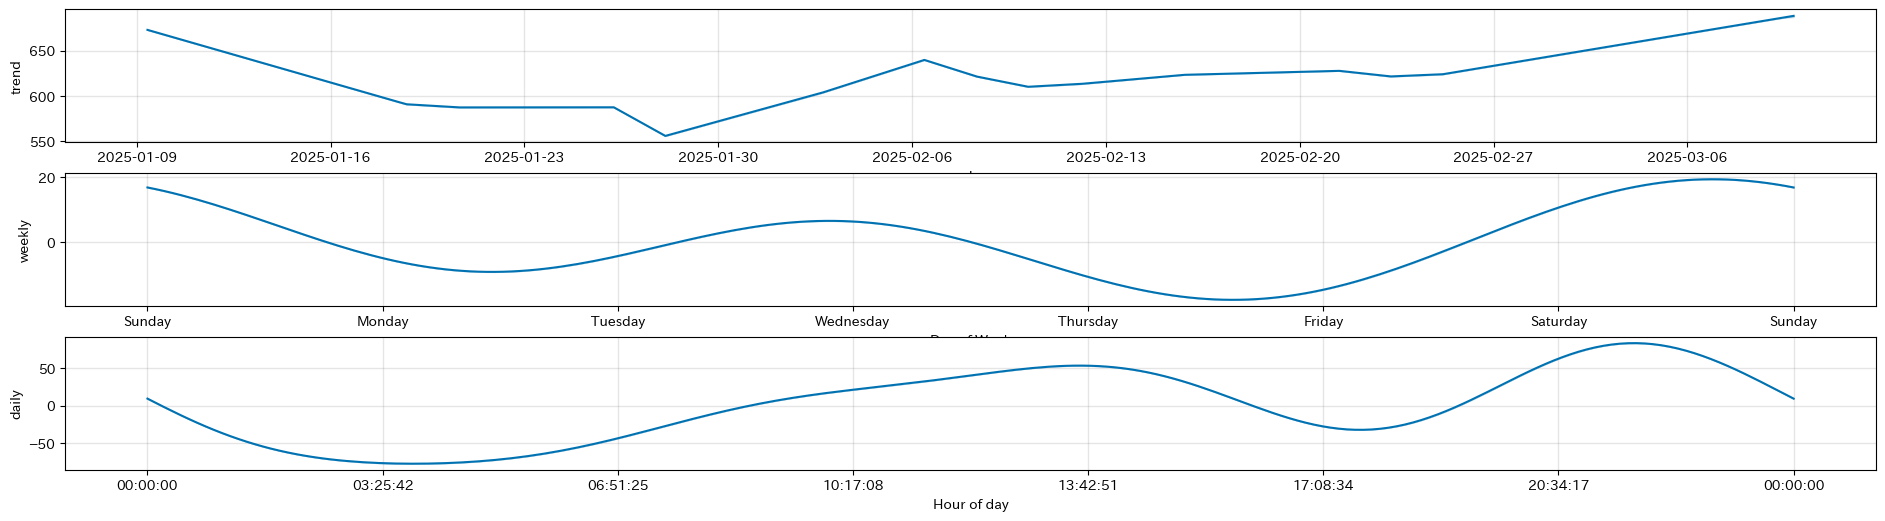

In [6]:
# Prophet用のデータに変換
df_prophet = df_catalog.rename(columns={'fetched_at': 'ds', 'catalog_length': 'y'})

# モデルのインスタンス化
model = Prophet(weekly_seasonality=True)

# モデルのフィッティング
model.fit(df_prophet)

# 未来のデータフレームを作成 (30分間隔で1日分予測)
future = model.make_future_dataframe(periods=48, freq='30min')

# 予測
forecast = model.predict(future)

# 結果をプロット
fig = model.plot(forecast)
fig.set_size_inches(20, 5)
plt.show()

# コンポーネントごとのプロット
fig2 = model.plot_components(forecast)
fig2.set_size_inches(20, 5)
plt.show()


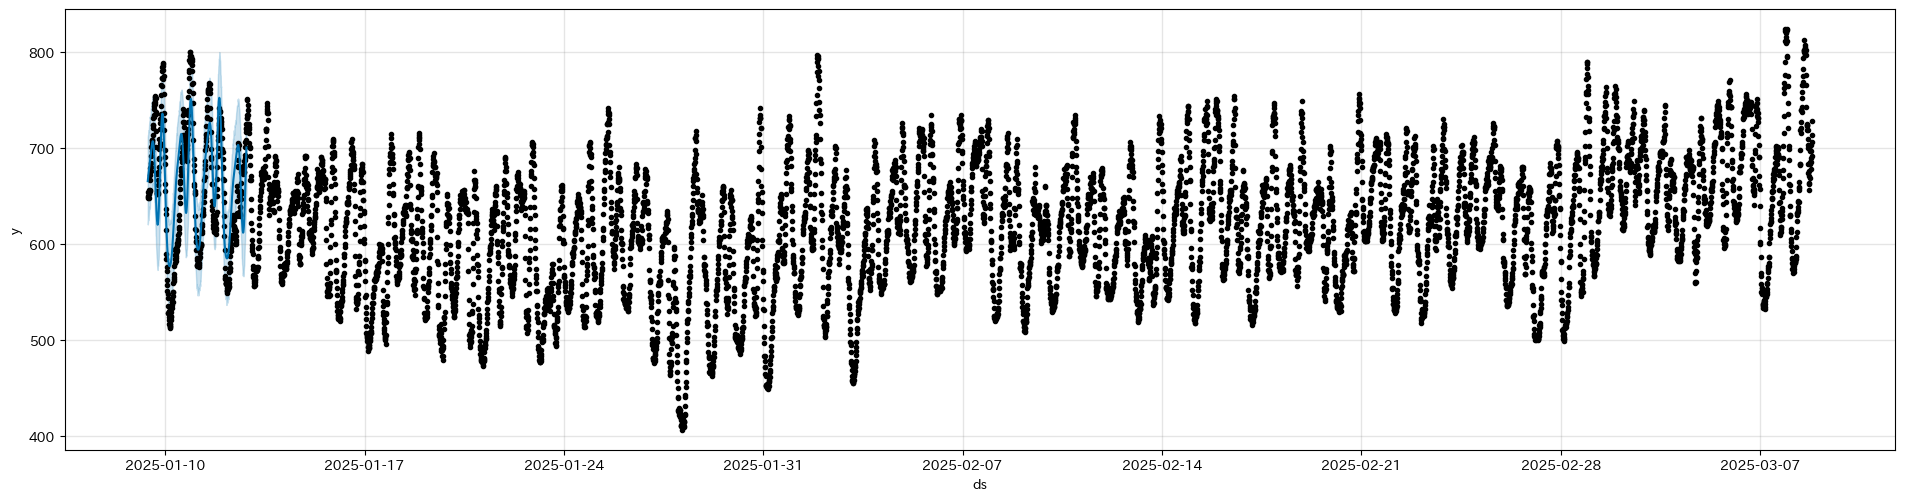

In [7]:
# 結果をプロット
fig = model.plot(forecast.head(500))
fig.set_size_inches(20, 5)
plt.show()